## Look at the similarity of this case with the hands-on learning activity (Link # 30)
![title](http://www.mikojulj4.com/mab_usb/CH01/raul123.gif)

# 30A Manufacturing Case  (Jupyter Notebook)

# Introduction to Data Visualization using a Jupyter notebook

This Notebook is designed to provide a bird's eye view of some `Data Analysis packages.` The goal is not to give an in-depth explanation of each package's features but rather demonstrate the purpose of a few used Data Analysis packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

## Jupyter

[Jupyter](https://jupyter.org) is not strictly speaking an `ML package.` It provides a browser front-end connected to an instance of `IPython` which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for demonstrations and tutorials.

## Pandas

[Pandas](http://pandas.pydata.org) is a library that provides a set of tools for data analysis (Python Data Analysis Library). 

`Pandas dataframes` can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)

In [45]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
import uncertainties.unumpy as unp
# from uncertainties import unumpy as unp

import uncertainties as unc
from matplotlib import style
from scipy.special import comb
from scipy.stats import fisher_exact
from scipy.stats import norm

##  Reading data
[Importing-Data-with-read-csv](https://www.datacamp.com/community/tutorials/pandas-read-csv) Pandas Tutorial: Importing Data with read_csv


In [46]:
# Reading data from a text file (tab-delimited)
# data = pd.read_csv('c:/Manu-Eng-1.txt',  sep='\t') Your data file located in a specific place
data = pd.read_csv('Manu-Eng-1.txt',  sep='\t') # Your data file on the Jupyter notebook working directory

# Give name to your variables
data.columns=['HMU','MOT']

# defining the variables 
x = data['HMU'].values   # Variable x has the values of Hours of Machine Use
y = data['MOT'].values   # Variable y has the values of Millimeters Off Target

n = len(y)        #  Data sample size 
max_x = max(x)    # The maximum value of Hours of Machine Use
min_x = min(x)    # The minimum value of Hours of Machine Use

##  From scipy.optimize  using the curve_fit method
* `SciPy optimize`provides functions for minimizing (or maximizing) objective functions.
* It includes solvers for nonlinear problems, linear programing, root finding, and `curve fitting`.
* `Curve fitting` finds an optimal `set of parameters` for a defined function that best fits a given set of observations.
* Follow link to see curve_fit and pcov details.
[pcov-is-the-covariance-matrix](https://stackoverflow.com/questions/51059863/why-pcov-in-optimize-curve-fit-is-a-two-by-two-matrix-and-which-value-correspond)


In [47]:
def f(x, a, b):                   # linear regression
    return a * x + b

popt, pcov = curve_fit(f, x, y)   #  from scipy.optimize import curve_fit  
                                  #  pcov is the covariance matrix of the estimated parameters.  
    
    
# see the parameter values
a = popt[0]  # coefficient value   
b = popt[1]  # constant value      


## Numpy

[Numpy](http://www.numpy.org) is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python `for` loop

## Calculate regression
* The `NumPy linspace function` (sometimes called `np.linspace`) is a tool in `Python` for creating numeric sequences.
* It's somewhat similar to the `NumPy arange function`.
* it creates sequences of evenly spaced numbers structured as a `NumPy array`.

## import uncertainties.unumpy as unp
* This package contains: Utilities that help with the creation and manipulation of NumPy arrays and matrices of numbers with uncertainties
* Follow link to see details.
[The-unumpy-package](https://pythonhosted.org/uncertainties/numpy_guide.html)


In [48]:
# calculate regression 
px = np.linspace(min_x, max_x, n) # REMEMBER:  Parameter_1:  min_x = min(x) P_2: max_x = max(x) P_3: n = len(y)   
py = a*px+b
nom = unp.nominal_values(py)

## predband() method
* `predband()` Calculates Upper & lower prediction bands `95% confidence interval` 

In [49]:
def predband(x, xd, yd, p, func, conf=0.95):   # define a function by using the command " def func1():"
    """
    Takes Arguments and returns upper & lower prediction bands
    Arg:
    x  = requested points
    xd = x data
    yd = y data
    p  = parameters
    func = function name
    Returns (in this order):
    lpb = lower prediction bands
    upb = upper prediction bands
   
   """
    alpha = 1.0 - conf    # significance          alpha = 0.05
    N = xd.size           # data sample size          N = 31   
    var_n = len(p)        # number of parameters  var_n = 2
    
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)     # Quantile of Student's t distribution for p=(1-alpha/2) = 0.975
                                                      # N - var_n 
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))    # Stdev of an individual measurement
    
    sx = (x - xd.mean()) ** 2             # Auxiliary definitions
    sxd = np.sum((xd - xd.mean()) ** 2)   # Auxiliary definitions
    
    yp = func(x, *p)  # Predicted values (best-fit model) p = popt = {a = popt[0] AND b = popt[1]}
    
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))  # Prediction band
    
    lpb, upb = yp - dy, yp + dy   # Upper & lower prediction bands.
    
    return lpb, upb


## Get Upper & lower prediction bands

In [50]:
lpb, upb = predband(px, x, y, popt, f, conf=0.95)  # call a function. The program will execute that function.
                                                   # px = np.linspace(min_x, max_x, n)
                                                   # x = data['HMU'].values
                                                   # y = data['MOT'].values
                                                   # popt, pcov = curve_fit(f, x, y)
                                                   # a = popt[0]  # coefficient value   
                                                   # b = popt[1]  # constant value   
                                                   # def f(x, a, b):  return a * x + b        --> linear regression
                                                   

##  Display 95% confidence interval

## Matplotlib

[Matplotlib](https://matplotlib.org) is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like, and an object-oriented API.

## Matplotlib.pyplot.plot

[Matplotlib.pyplot.plot](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.plot.html) Plot y versus x as lines and/or markers.


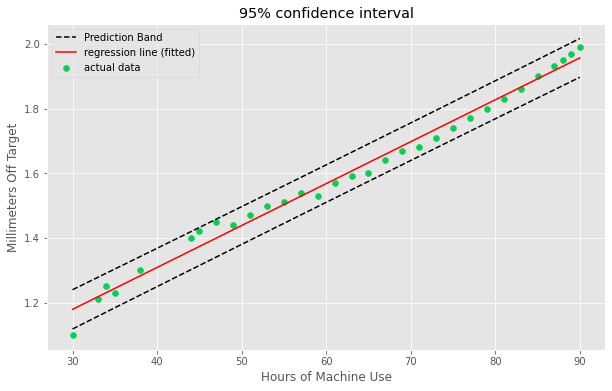

In [51]:
style.use('ggplot')       #  from matplotlib import style
                          #  ggplot style, adjusts the style to emulate ggplot (a plotting package for R)

fig = plt.figure(figsize=(10, 6))       # USING: import matplotlib.pyplot as plt
plt.title('95% confidence interval')

                          # import matplotlib.pyplot as plt
plt.xlabel("Hours of Machine Use")    # Pyplot is a group of functions in the visualization package Matplotlib     
plt.ylabel("Millimeters Off Target")    # Its functions manipulate elements of a figure, such as creating a model
                          # creating a plotting area, plotting lines, adding plot labels, etc.

plt.plot(px, lpb, 'k--',label='Prediction Band')  # See link Matplotlib.pyplot.plot for Format Strings
plt.plot(px, upb, 'k--')                          # Matplotlib.pyplot.plot [Plot y versus x as lines and/or markers]

plt.scatter(x,y, color='#0acd54',label='actual data')
plt.plot(px, nom, c='red', label='regression line (fitted)')

# Display 95% confidence interval

plt.legend(loc="upper left")
plt.show()